In [5]:
import numpy as np
import pandas as pd

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
#titanic = pd.read_csv("https://github.com/datasciencedojo/datasets/blob/master/titanic.csv")
titanic = pd.read_csv('/content/drive/MyDrive/Datasets/titanic3.csv')
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [8]:
titanic.shape

(1310, 14)

### Display count of survivals grouped by sex

In [9]:
titanic.groupby('sex')['survived'].size()

sex
female    466
male      843
Name: survived, dtype: int64

In [10]:
titanic.groupby('sex')['survived'].mean()

sex
female    0.727468
male      0.190985
Name: survived, dtype: float64

## Using Pivot - Representing survivals in Sex vs Class table

In [ ]:
titanic.pivot_table('survived', index='sex', columns='pclass')

pclass,1.0,2.0,3.0
sex,,,
female,0.965278,0.886792,0.490741
male,0.340782,0.146199,0.152130


In [ ]:
titanic.pivot_table('survived', index='sex', columns='pclass', aggfunc='count')

pclass,1.0,2.0,3.0
sex,,,
female,144,106,216
male,179,171,493


## Multi-level pivot tables

In [11]:
age = pd.cut(titanic['age'], [0, 18, 80])
titanic.pivot_table('survived', ['sex', age], 'pclass', aggfunc='count')

pclass           1.0  2.0  3.0
sex    age                    
female (0, 18]    13   21   58
       (18, 80]  120   82   94
male   (0, 18]     8   21   72
       (18, 80]  143  137  277

In [ ]:
age = pd.cut(titanic['age'], [0, 18, 80])
age.head(20)

0     (18.0, 80.0]
1      (0.0, 18.0]
2      (0.0, 18.0]
3     (18.0, 80.0]
4     (18.0, 80.0]
5     (18.0, 80.0]
6     (18.0, 80.0]
7     (18.0, 80.0]
8     (18.0, 80.0]
9     (18.0, 80.0]
10    (18.0, 80.0]
11     (0.0, 18.0]
12    (18.0, 80.0]
13    (18.0, 80.0]
14    (18.0, 80.0]
15             NaN
16    (18.0, 80.0]
17    (18.0, 80.0]
18    (18.0, 80.0]
19    (18.0, 80.0]
Name: age, dtype: category
Categories (2, interval[int64, right]): [(0, 18] < (18, 80]]

In [13]:
fare = pd.qcut(titanic['fare'], 2)
#print(fare)
titanic.pivot_table('survived', ['sex', age], [fare, 'pclass'])

fare            (-0.001, 14.454]                     (14.454, 512.329]  \
pclass                       1.0       2.0       3.0               1.0   
sex    age                                                               
female (0, 18]               NaN  0.750000  0.666667          0.923077   
       (18, 80]              NaN  0.866667  0.437500          0.966667   
male   (0, 18]               NaN  0.000000  0.264706          0.750000   
       (18, 80]              0.2  0.119048  0.154167          0.333333   

fare                                 
pclass                2.0       3.0  
sex    age                           
female (0, 18]   1.000000  0.392857  
       (18, 80]  0.884615  0.433333  
male   (0, 18]   0.687500  0.157895  
       (18, 80]  0.037736  0.194444

## Dummy Weather Data

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/Dummy Weather.csv', parse_dates=['date'] )
df

,date,city,temperature,humidity
0,2017-05-01,New York,65,56
1,2017-06-02,New York,66,58
2,2017-07-03,New York,68,60
3,2017-05-01,Mumbai,72,80
4,2017-06-02,Mumbai,75,83
5,2017-07-03,Mumbai,73,85
6,2017-05-01,Beijing,80,26
7,2017-06-02,Beijing,78,30
8,2017-07-03,Beijing,76,35


### Display data in this format
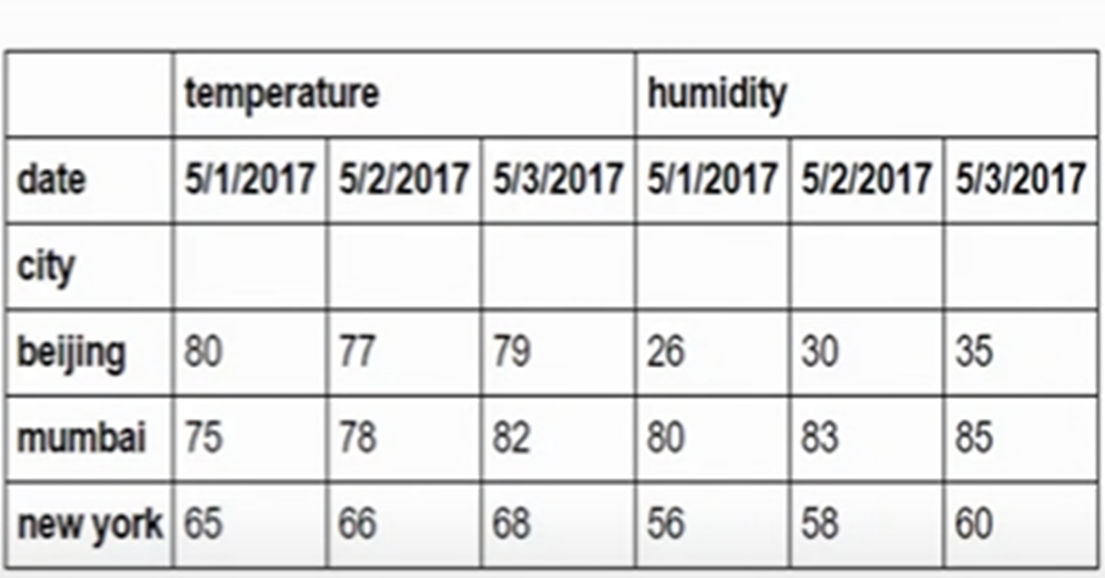

### date vs city

In [ ]:
df.pivot_table(index="date", columns="city")

humidity                 temperature                
city        Beijing Mumbai New York     Beijing Mumbai New York
date                                                           
2017-05-01       26     80       56          80     72       65
2017-06-02       30     83       58          78     75       66
2017-07-03       35     85       60          76     73       68

### date vs city with only humidity

In [ ]:
df.pivot_table(index="date", columns="city", values = 'humidity')

city,Beijing,Mumbai,New York
date,,,
2017-05-01,26,80,56
2017-06-02,30,83,58
2017-07-03,35,85,60


### finding average temp per month using grouper

In [ ]:
df.pivot_table(index=pd.Grouper(freq='M', key='date'), columns='city')

humidity                 temperature                
city        Beijing Mumbai New York     Beijing Mumbai New York
date                                                           
2017-05-31       26     80       56          80     72       65
2017-06-30       30     83       58          78     75       66
2017-07-31       35     85       60          76     73       68